In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_model_comparison(models, sizes, times):
    """
    生成模型参数规模与运行时间的散点对比图

    参数：
    models : 列表，模型名称列表
    sizes : 数组 / 列表，长度与 models 一致，每个元素为对应模型的参数规模
    times : 数组 / 列表，长度与 models 一致，每个元素为对应模型的运行时间
    

    配色：
    colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
    """
    # 定义标记和颜色（长度需与 models 一致或可循环使用）
    markers = ['o', '^', 'D', 'v', 'p']
    colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

    plt.figure(figsize=(8, 6))

    # 绘制散点
    for i, model in enumerate(models):
        plt.scatter(sizes[i], times[i],
                    marker=markers[i % len(markers)],
                    s=200,
                    c=[colors[i % len(colors)]],
                    label=model)

    # 添加标签（偏移在右下角）
    for i, model in enumerate(models):
        plt.annotate(model,
                     (sizes[i], times[i]),
                     xytext=(10, -15),
                     textcoords='offset points',
                     fontsize=10,
                     color=colors[i % len(colors)])

    # 设置对数坐标
    plt.xscale('log')
    plt.yscale('log')

    # 网格
    plt.grid(True, which="both", ls="-", alpha=0.2)

    # 标签
    plt.xlabel('Parameter Size (MB)', fontsize=12)
    plt.ylabel('Running Time (s/epoch)', fontsize=12)

    # 布局
    plt.tight_layout()

    # 保存或显示
    plt.savefig('model_comparison_no_reMVC.pdf', dpi=300, bbox_inches='tight')
    plt.show()

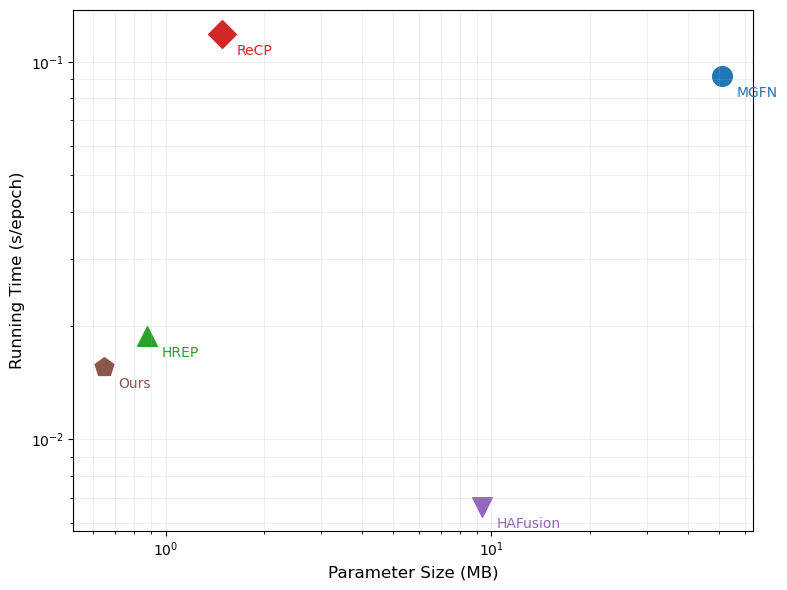

In [2]:
# ==== 示例调用 ====
models = ['MGFN', 'HREP', 'ReCP', 'HAFusion', 'Ours']
sizes = np.array([51.07, 0.879, 1.494, 9.370, 0.649])
times = np.array([0.0915, 0.0188, 0.1187, 0.0066, 0.0155])

plot_model_comparison(models, sizes, times)